In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [23]:
def readColumnsFromFile(filename):
    '''reads in the raw data and returns a list of lists.
    the first list (returned[0]) is the x-coords. '''
    with open(filename) as infile:
        reader = csv.reader(infile, delimiter=" ")
        row_array = []
        
        for row in reader:
            row_data = [col.strip() for col in row]          
            row_array.append(row_data)
            
        #converts rows to columns and removes the last item in the columns list which is just spaces
        #this is an atrifact of the file printing system
        #also has zip output in lists not tuples
        col_array = [list(a) for a in zip(*row_array)]
        del col_array[-1]
        #convert list of lists of strings to list of lists of floats
        #return list([[float(j) for j in i] for i in col_array])
        return np.array([[float(j) for j in i] for i in col_array])

In [56]:
#FGTA simple MIC curves no death
FGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
FGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
FGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_fast_growers/simple-fastGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

#SGTA simple MIC curves no death
SGTA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
SGTA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
SGTA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_slow_growers/simple-slowGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

#GITA (growth rate independent - flat mic) simple MIC curves no death
GITA_simple_alpha_specificAlpha_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-spatialDistribution-FINAL.txt')
GITA_simple_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')
GITA_simple_alpha_002_spatial = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-spatialDistribution-FINAL.txt')
GITA_simple_alpha_002_gRate = readColumnsFromFile('MasterPlotFolder/simple_flat_growers/simple-flatGrowers-alpha=0.02-gRateDistribution-FINAL.txt')

FGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
FGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/fastGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')

SGTA_wDeath_alpha_specificAlpha_aliveSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-aliveSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_deadSpatial = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-deadSpatialDistribution-FINAL.txt')
SGTA_wDeath_alpha_specificAlpha_gRate = readColumnsFromFile('MasterPlotFolder/with_death/slowGrowers_death-alpha=0.004884694070738408-gRateDistribution-FINAL.txt')




[[0.0000e+00 1.0000e+00 2.0000e+00 ... 4.9700e+02 4.9800e+02 4.9900e+02]
 [9.9950e+01 1.0000e-01 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.9010e+02 5.6915e+02 5.6340e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.5340e+02 5.2315e+02 5.1945e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.6330e+02 5.1940e+02 5.0470e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.5930e+02 5.1480e+02 5.2085e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


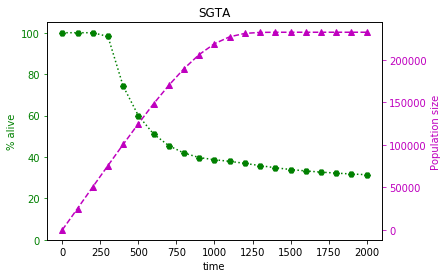

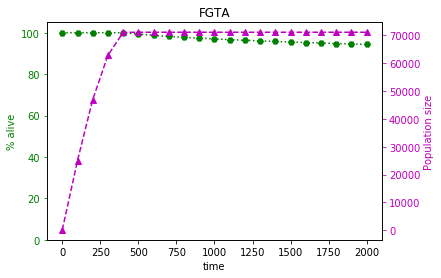

In [43]:
def percentAliveAndSizeOverTime(alive_data, dead_data, title):
    
    pc_alive_t = []
    size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    
    for live_pop, dead_pop in zip(alive_data[1:], dead_data[1:]):
        
        num_alive = sum(live_pop)
        num_dead = sum(dead_pop)
        
        size_of_pop_t.append(num_alive+num_dead)
        pc_alive_t.append((num_alive/(num_alive+num_dead))*100.)

        
    fig, ax1 = plt.subplots()
    ax1.plot(t, pc_alive_t, 'gH:')
    ax1.set_xlabel('time')
    ax1.set_ylabel('% alive', color='g')
    ax1.tick_params('y', colors='g')
    ax1.set_ylim(0, 105.)
    
    ax2 = ax1.twinx()
    ax2.plot(t, size_of_pop_t, 'm^--')
    ax2.set_ylabel('Population size', color='m')
    ax2.tick_params('y', colors='m')
    
    #fig.tight_layout()
    plt.title(title)
    plt.savefig(title+'-percentAlive-PopSize-overTime.png')
    plt.show()
    
percentAliveAndSizeOverTime(SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, "SGTA")
percentAliveAndSizeOverTime(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, "FGTA") 

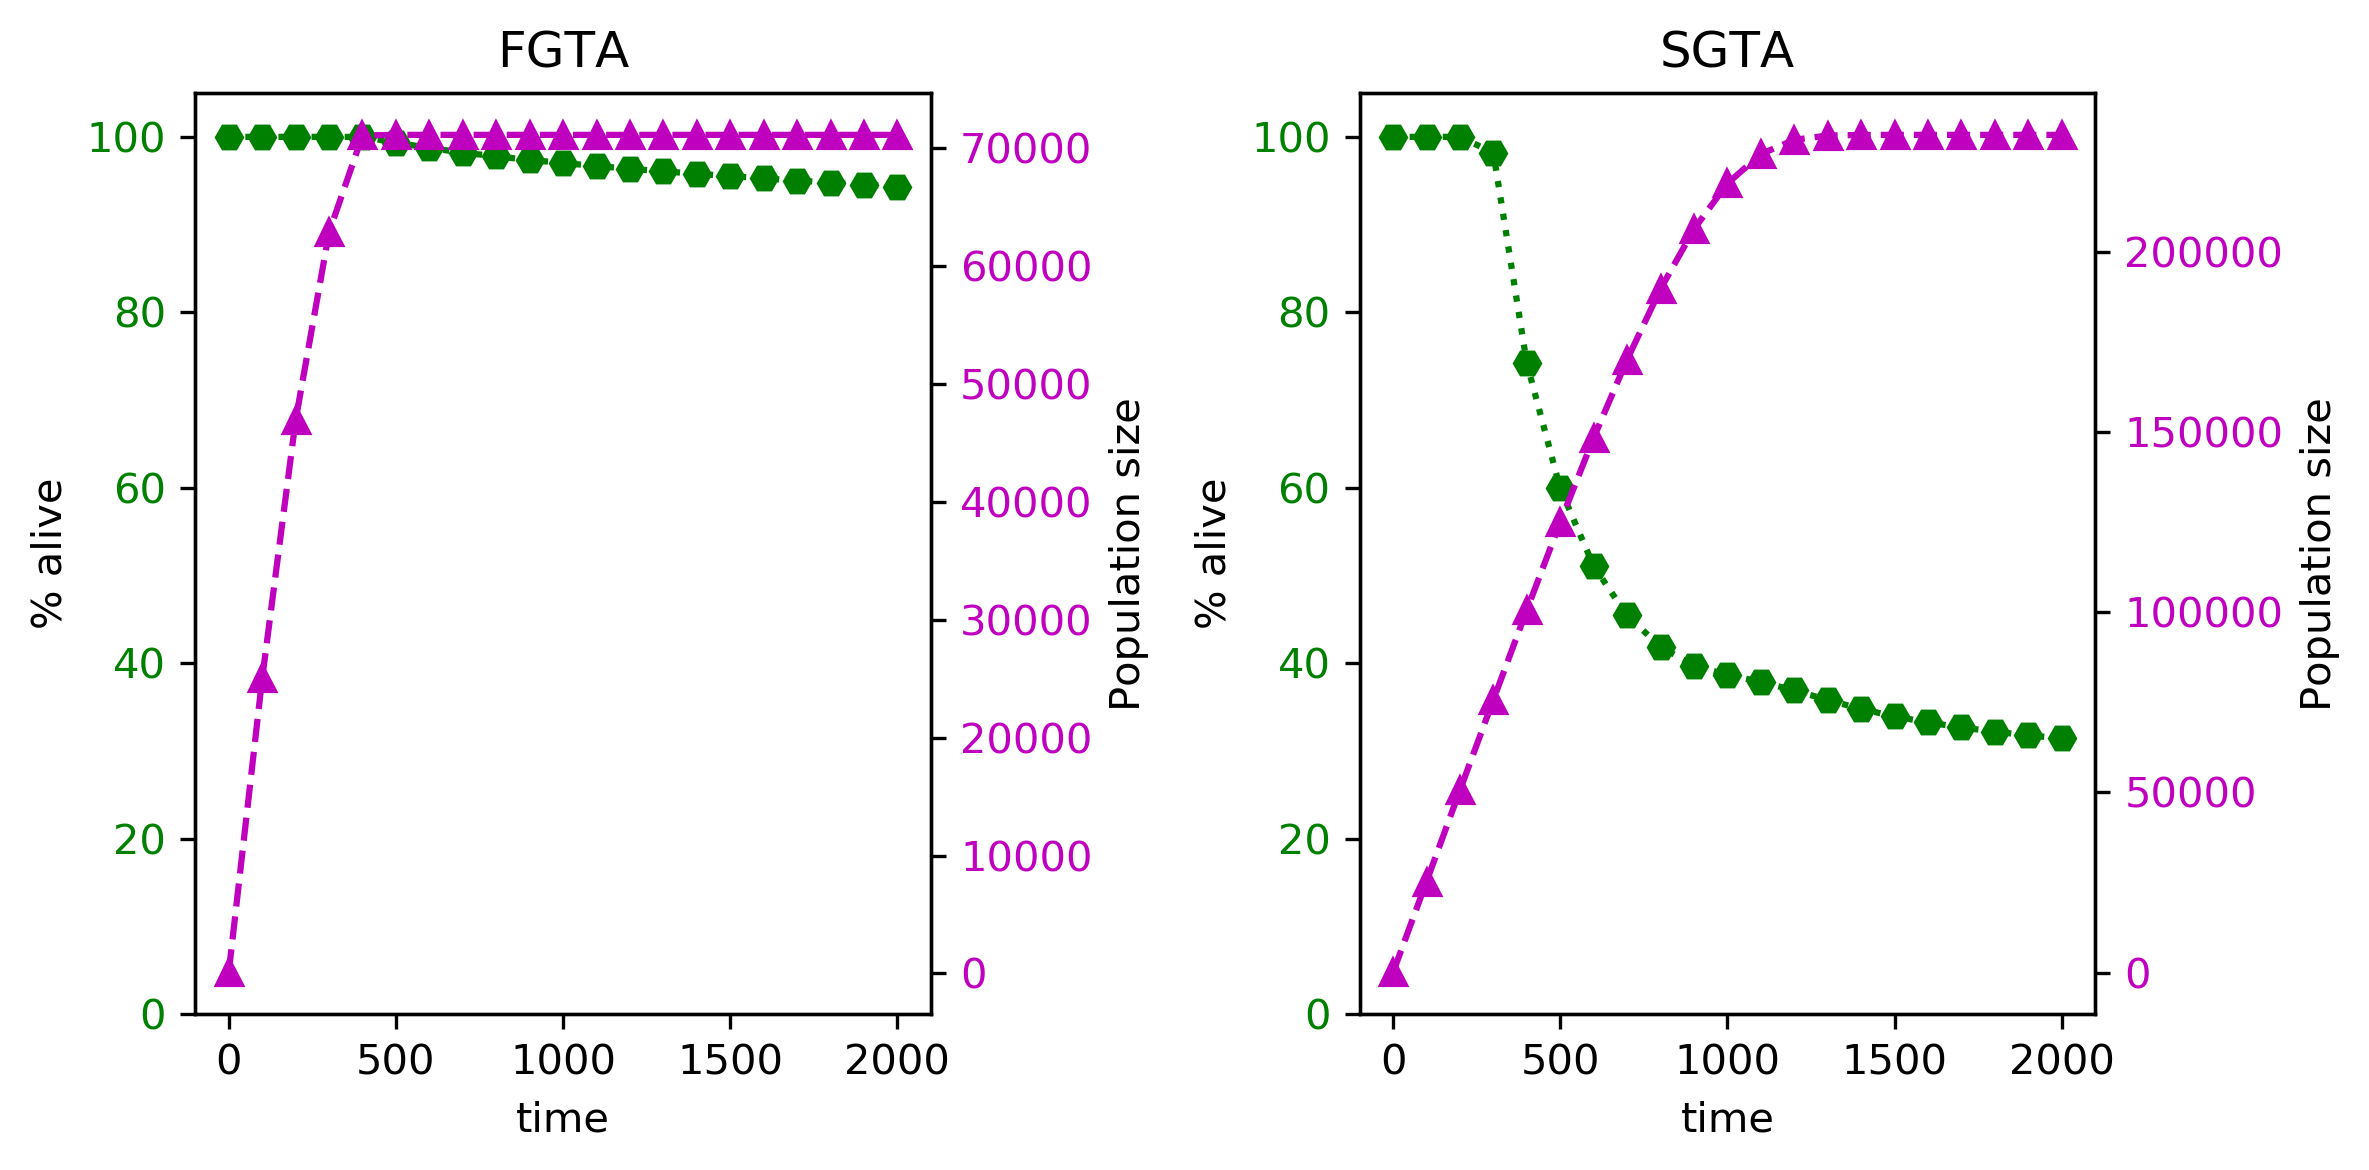

In [54]:
def percentAliveOverTimeSideBySide(FGTA_alive_data, FGTA_dead_data, SGTA_alive_data, SGTA_dead_data):
    '''This makes one plot of both the percentage plots'''
    
    FGTA_pc_alive_t = []
    FGTA_size_of_pop_t = []
    SGTA_pc_alive_t = []
    SGTA_size_of_pop_t = []
    t = [i for i in np.linspace(0., 2000., 21)]
    
    #this combines all the lists together in a way which allows us to iterate over them all in one loop
    for FGTA_alive_pop, FGTA_dead_pop, SGTA_alive_pop, SGTA_dead_pop in zip(FGTA_alive_data[1:], FGTA_dead_data[1:], SGTA_alive_data[1:], SGTA_dead_data[1:]):
        
        FGTA_num_alive = sum(FGTA_alive_pop)
        FGTA_num_dead = sum(FGTA_dead_pop)
        
        SGTA_num_alive = sum(SGTA_alive_pop)
        SGTA_num_dead = sum(SGTA_dead_pop)
        
        FGTA_size_of_pop_t.append(FGTA_num_alive+FGTA_num_dead)
        FGTA_pc_alive_t.append((FGTA_num_alive/(FGTA_num_alive+FGTA_num_dead))*100.)
        
        SGTA_size_of_pop_t.append(SGTA_num_alive+SGTA_num_dead)
        SGTA_pc_alive_t.append((SGTA_num_alive/(SGTA_num_alive+SGTA_num_dead))*100.)
        
    
    #here we do all the plotting
    pc_colour, pc_marker = ['g', 'H']
    num_colour, num_marker = ['m', '^']
    
    def two_scales(ax1, time, data1, data2, c1, c2, m1, m2):
        ax2 = ax1.twinx()
        ax1.plot(time, data1, color=c1, marker=m1, linestyle=':')
        ax1.set_xlabel('time')
        ax1.set_ylabel('% alive')
        ax1.set_ylim([0.,105.])
        ax2.plot(time, data2, color=c2, marker=m2, linestyle='--')
        ax2.set_ylabel('Population size')
        return ax1, ax2
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4), dpi=300)
    ax1, ax1a = two_scales(ax1, t, FGTA_pc_alive_t, FGTA_size_of_pop_t, pc_colour, num_colour, pc_marker, num_marker)
    ax2, ax2a = two_scales(ax2, t, SGTA_pc_alive_t, SGTA_size_of_pop_t, pc_colour, num_colour, pc_marker, num_marker)

    # Change color of each axis
    def color_y_axis(ax, color):
        """Color your axes."""
        for t in ax.get_yticklabels():
            t.set_color(color)

    color_y_axis(ax1, pc_colour)
    color_y_axis(ax1a, num_colour)
    color_y_axis(ax2, pc_colour)
    color_y_axis(ax2a, num_colour)
    
    ax1.set_title("FGTA")
    ax2.set_title("SGTA")
    plt.tight_layout()
    plt.savefig('bothAntibiotics-percentAlive-PopSize-overTime.png')
    #plt.show()  
    
percentAliveOverTimeSideBySide(FGTA_alive_data=FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_dead_data=FGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_alive_data=SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_dead_data=SGTA_wDeath_alpha_specificAlpha_deadSpatial)


In [6]:
def plotAllMeasurementsIndividually(data, title, yLabel, antibiotic_type='SGTA', alphaVal='specific_alpha'):
    '''This plots each time measurement individually and saves them in a breakdown folder.'''
    
    timestep = 100.
    max_value = np.amax(data[1:])
    min_value = np.amin(data[1:])
    
    for i in range(1, len(data)):
        plt.gcf().clear()
        plt.ylim(min_value+(0.1*min_value), max_value+(0.1*max_value))
        plt.plot(data[0], data[i], linewidth=2.5)
        plt.title(antibiotic_type+' '+title+' - t ='+str(timestep*(i-1)))
        plt.axhline(0, color='black')
        plt.xlabel('Microhabitat')
        plt.ylabel(yLabel)
        
        plt.savefig(antibiotic_type+'-'+title+'-breakdown/'+antibiotic_type+'-alpha='+alphaVal+'-'+
                    title+'-t='+str(timestep*(i-1))+'.png')
        plt.gcf().clear()
        
    for measurement in data[1:]:
        plt.plot(data[0], measurement, linewidth=2.5)
        plt.title(antibiotic_type+' '+title+' (all)')
        plt.xlabel('Microhabitat')
        plt.ylabel(yLabel)
    plt.axhline(0, color='black')
    plt.savefig(antibiotic_type+'-'+title+'-breakdown/'+antibiotic_type+'-alpha='+alphaVal+'-'+title+'-all.png')

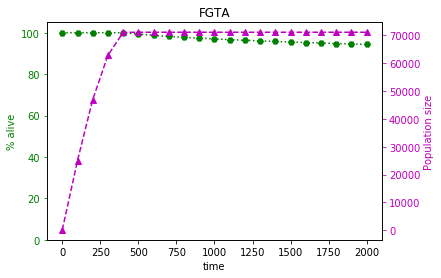

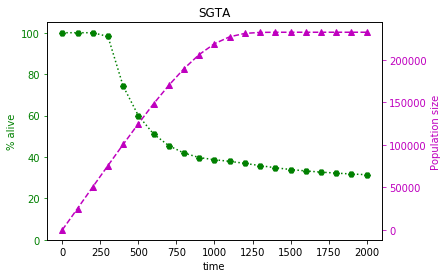

In [55]:
#Here the percentage alive plots are done side by side in the one figure
#percentAliveOverTimeSideBySide(FGTA_alive_data=FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_dead_data=FGTA_wDeath_alpha_specificAlpha_deadSpatial, SGTA_alive_data=SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_dead_data=SGTA_wDeath_alpha_specificAlpha_deadSpatial)
percentAliveAndSizeOverTime(FGTA_wDeath_alpha_specificAlpha_aliveSpatial, FGTA_wDeath_alpha_specificAlpha_deadSpatial, 'FGTA')
percentAliveAndSizeOverTime(SGTA_wDeath_alpha_specificAlpha_aliveSpatial, SGTA_wDeath_alpha_specificAlpha_deadSpatial, 'SGTA')


In [ ]:
def plotThreeDistributionsSideBySide